In [1]:
import pandas as pd
dados = pd.read_csv('../files/emp_automovel.csv')

x = dados.drop('inadimplente', axis =1)
y = dados ['inadimplente']

In [2]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [3]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [4]:
print(f'Acurácia: {modelo.score(x, y)}')

Acurácia: 1.0


In [5]:
from sklearn.model_selection import train_test_split

x, x_teste, y, y_teste = train_test_split(x, y, test_size=0.15, stratify=y, random_state=5)

x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify=y, random_state=5)

In [6]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [7]:
print(f'Acuracia de treino: {modelo.score(x_treino,y_treino)}')

print(f'Acuracia de validacao: {modelo.score(x_val,y_val)}')

Acuracia de treino: 1.0
Acuracia de validacao: 0.8469645501262956


In [8]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_treino, y_treino)

print(f'Acuracia de treino: {modelo.score(x_treino,y_treino)}')

print(f'Acuracia de validacao: {modelo.score(x_val,y_val)}')

Acuracia de treino: 0.9206155632984901
Acuracia de validacao: 0.9057573382109573


In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
y_previsto = modelo.predict(x_val)

matriz_confusao = confusion_matrix(y_val, y_previsto)

print(matriz_confusao)

[[10356   123]
 [  959    43]]


In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

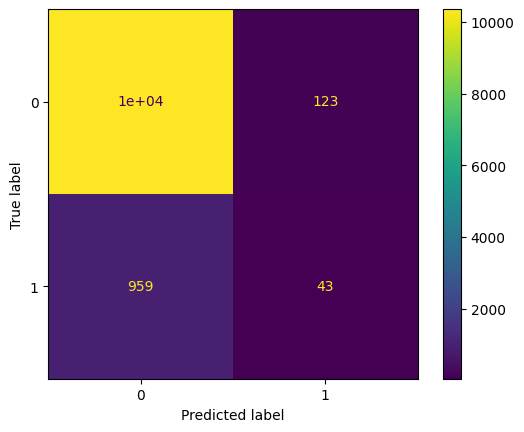

In [12]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)

visualizacao.plot();

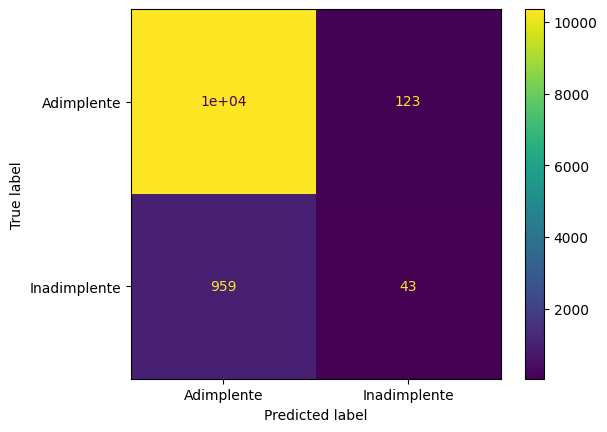

In [13]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente','Inadimplente'])

visualizacao.plot();

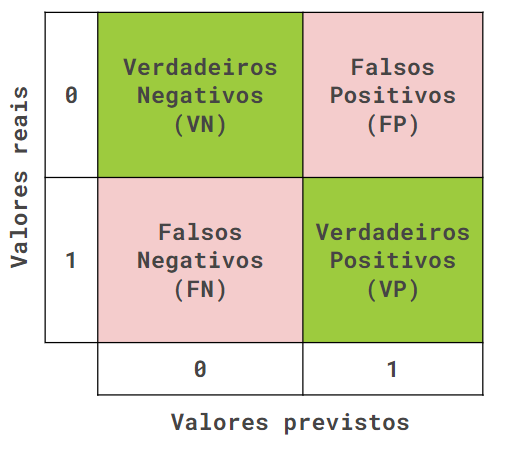

In [14]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')



Acurácia de treino: 0.915301974448316
Acurácia de validação: 0.9128124727811167


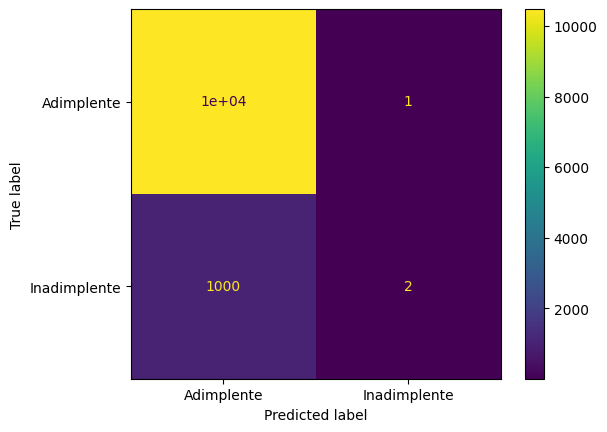

In [15]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao,
                                      display_labels = ['Adimplente', 'Inadimplente'])
visualizacao.plot();

In [16]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_val, y_previsto))

0.9128124727811167


In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_val,y_previsto))

print(recall_score(y_val,y_previsto))

print(f1_score(y_val,y_previsto))

0.6666666666666666
0.001996007984031936
0.003980099502487562


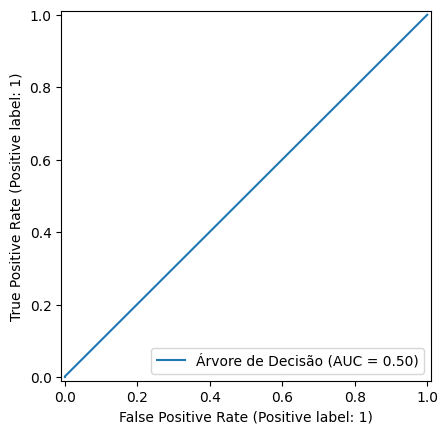

In [18]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

In [19]:
from sklearn.metrics import roc_auc_score
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5009502895154438


In [20]:
from sklearn.metrics import PrecisionRecallDisplay

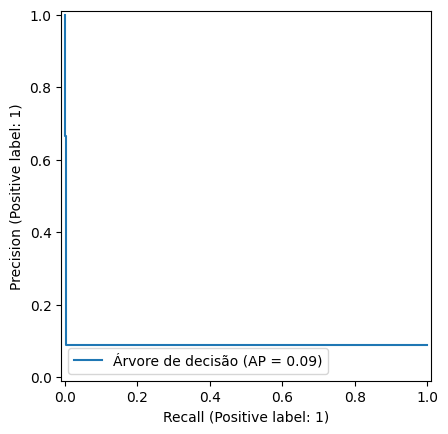

In [21]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

In [22]:
from sklearn.metrics import average_precision_score

In [23]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.0884310987814459


In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_val, y_previsto,digits=4))

              precision    recall  f1-score   support

           0     0.9129    0.9999    0.9544     10479
           1     0.6667    0.0020    0.0040      1002

    accuracy                         0.9128     11481
   macro avg     0.7898    0.5010    0.4792     11481
weighted avg     0.8914    0.9128    0.8715     11481



In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10479
           1       0.67      0.00      0.00      1002

    accuracy                           0.91     11481
   macro avg       0.79      0.50      0.48     11481
weighted avg       0.89      0.91      0.87     11481

